In [203]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

import numpy as np
from scipy import optimize
from model import Model
from matplotlib import pyplot as plt
from Simulation import simulate
import EGM
import tools
import DC_EGM

import warnings
warnings.filterwarnings('ignore') #:)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [204]:
# parameter set 1
# High edu among all rich (slightly higher among smart)
# High edu with poor, smart. Very low edu with poor, stupid
# Smart matters more than rich
par1 = {'a_max': 100,
        'Smax': 6,
        'sigma_taste': 0.3,
        'sigma': 0.5,
        'm_initial': 10,
        'phi_high': 3,
        'phi_low': 1,
        'theta_high': 0.66,
        'theta_low': 0.33,
        'lambda_max': 0.797
        }

# parameter set 2
# High edu among rich, low among poor. Slightly higher edu among smart than poor
# rich matters more than smart
par2 = {'a_max':100,
        'Smax': 6,
        'sigma_taste': 0.3,
        'sigma': 0.5,
        'm_initial': 1,
        'phi_high': 5,
        'phi_low': 1,
        'theta_high':0.66,
        'theta_low':0.33,
        'lambda_max':0.797
        }

# parameter set 3
# Rich are better educated than poor, smart are better educated than stupid.
# Rich and smart are approx equally important
par3 = {'a_max': 80,
        'Smax': 6,
        'sigma_taste':0.3,
        'sigma': 0.4,
        'm_initial':5,
        'phi_high':3,
        'phi_low': 1,
        'theta_high':0.8,
        'theta_low':0.1,
        'lambda_max':0.797
        }

In [205]:
model = Model()
model.setup()

# solution and simulation specs
model.par.Na = 200
model.par.Tmax = 45
model.par.Tsim = model.par.Tmax
model.par.Ntypes = 4
model.par.N = 1000

# set parameters
for key, val in par2.items():
    model.par.__setattr__(key, val)

model.set_grids()
par = model.par
sol = model.sol
sim = model.sim

In [206]:
model.solve()
print('solved')
simulate(sim, sol, par)
print('simulated')

solved
simulated


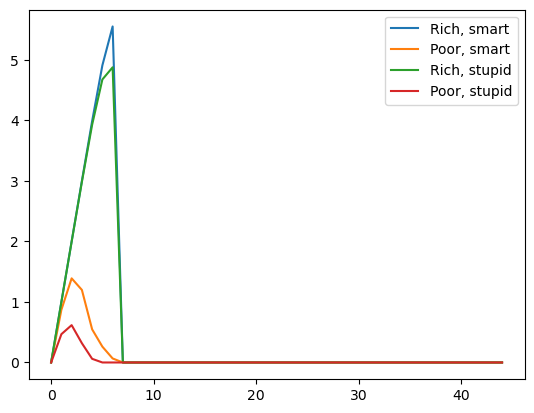

In [207]:
# avg. education profile
t0 = sim.type == 0
t1 = sim.type == 1
t2 = sim.type == 2
t3 = sim.type == 3

plt.plot(sim.S[t0].mean(axis=0), label='Rich, smart')
plt.plot(sim.S[t1].mean(axis=0), label='Poor, smart')
plt.plot(sim.S[t2].mean(axis=0), label='Rich, stupid')
plt.plot(sim.S[t3].mean(axis=0), label='Poor, stupid')
plt.legend();


Text(0.5, 1.0, 'Consumption')

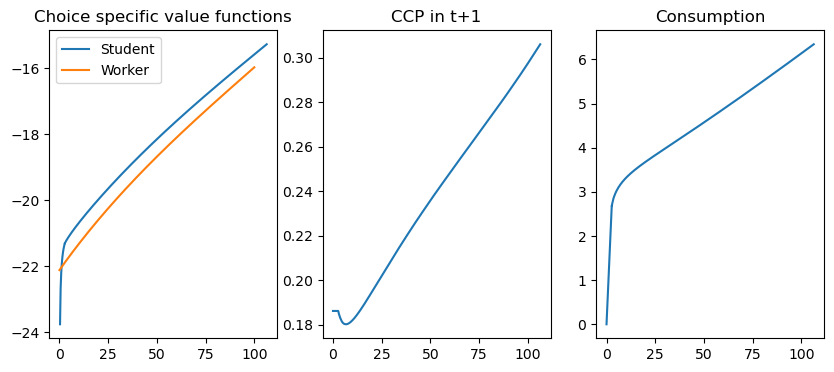

In [208]:
t = 4
s = 4
type = 0

fig,ax = plt.subplots(1,3,figsize=(10,4))

ax[0].plot(sol.m[type,t,0,s,1:,0],sol.V[type,t,0,s,1:,0],label = "Student")
ax[0].plot(sol.m[type,t,1,s,1:,0],sol.V[type,t,1,s,1:,0],label = "Worker")
ax[0].legend()
ax[0].set_title('Choice specific value functions')

ax[1].plot(sol.m[type,t,0,s,:,0],sol.ccp_work[type,t,0,s,:,0],label = "Student")
ax[1].set_title('CCP in t+1')

ax[2].plot(sol.m[type,t,0,s,:,0],sol.c[type,t,0,s,:,0],label = "Student")
ax[2].set_title('Consumption')

Text(0.5, 1.0, 'Savings')

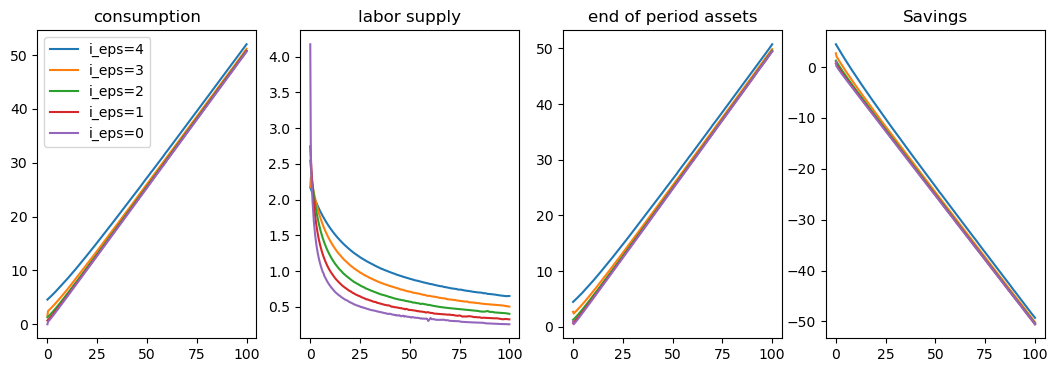

In [209]:
# plot some policy functions, just to be sure
t = -1
edu = 0
type = 0 

fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(1,4,1)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.c[type, t, 1, edu, par.Ba:, 4], label='i_eps=4')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.c[type, t, 1, edu, par.Ba:, 3], label='i_eps=3')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.c[type, t, 1, edu, par.Ba:, 2], label='i_eps=2')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.c[type, t, 1, edu, par.Ba:, 1], label='i_eps=1')
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.c[type, t, 1, edu, par.Ba:, 0], label='i_eps=0')
ax.set_title('consumption')
ax.legend()

ax = fig.add_subplot(1,4,2)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.ell[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.ell[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.ell[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.ell[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.ell[type, t, 1, edu, par.Ba:, 0])
ax.set_title('labor supply')

ax = fig.add_subplot(1,4,3)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.a[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.a[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.a[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.a[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.a[type, t, 1, edu, par.Ba:, 0])
ax.set_title('end of period assets')

ax = fig.add_subplot(1,4,4)
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 4], sol.a[type, t, 1, edu, par.Ba:, 4]-sol.m[type, t, 1, edu, par.Ba:, 4])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 3], sol.a[type, t, 1, edu, par.Ba:, 3]-sol.m[type, t, 1, edu, par.Ba:, 3])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 2], sol.a[type, t, 1, edu, par.Ba:, 2]-sol.m[type, t, 1, edu, par.Ba:, 2])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 1], sol.a[type, t, 1, edu, par.Ba:, 1]-sol.m[type, t, 1, edu, par.Ba:, 1])
ax.plot(sol.m[type, t, 1, edu, par.Ba:, 0], sol.a[type, t, 1, edu, par.Ba:, 0]-sol.m[type, t, 1, edu, par.Ba:, 0])
ax.set_title('Savings')

Text(0.5, 1.0, 'm')

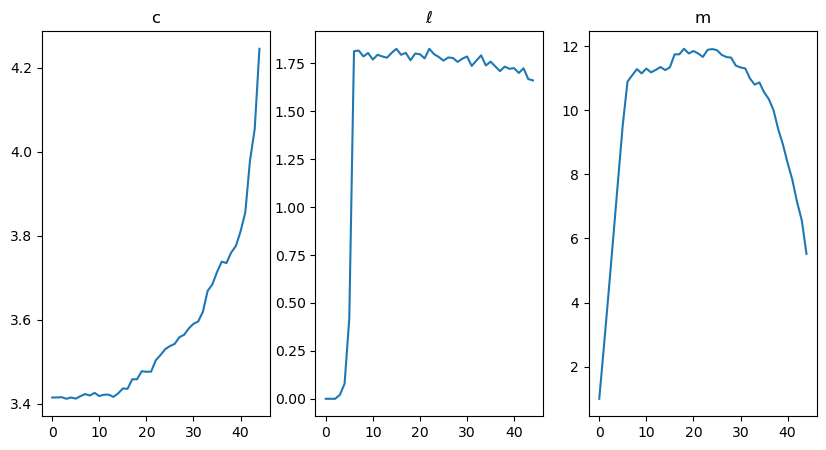

In [210]:
s = sim.S.max(axis=1)
I = t0

fig,ax = plt.subplots(1,3,figsize=(10,5))
ax[0].plot(np.mean(sim.c[I,:],axis=0),label="c")
ax[0].set_title('c')

ax[1].plot(np.mean(sim.ell[I,:],axis=0),label="$\ell$")
ax[1].set_title('$\ell$')

ax[2].plot(np.mean(sim.m[I,:],axis=0),label="m")
ax[2].set_title('m')
#fig.legend()

### Euler errors - TBC

In [211]:
Delta_time, epsilon_time =model.euler_errors()

In [214]:
Delta_time[:-2]

[-0.00023277759446069677,
 -4.74432679843715e-05,
 0.00021452381414500677,
 -0.0002138024419040119,
 8.440152040732572e-05,
 8.073488102018434e-05,
 5.101583204653287e-05,
 7.618059990706183e-05,
 -1.0735000031342162e-05,
 7.617002576782331e-05,
 4.6092395200307394e-05,
 4.96295963506564e-05,
 0.000275308855974497,
 5.532159894823836e-05,
 0.00012250649593123153,
 7.089841107524457e-05,
 0.0001308878666075737,
 3.158517592495663e-05,
 6.58032659095282e-05,
 4.306535247907139e-05,
 5.392273388139864e-05,
 1.0361224246780478e-05,
 -7.892617500210878e-07,
 6.320136306592584e-05,
 3.48376705155837e-05,
 3.266536851579455e-05,
 4.217181130441952e-05,
 0.00018698603808752441,
 6.061320373860079e-05,
 2.97863818866618e-05,
 3.64007334189325e-05,
 3.7237996309916556e-05,
 1.705131333723799e-05,
 -2.311416306732194e-05,
 7.144996353549559e-05,
 9.038291105706566e-05,
 -4.2654504688550766e-05,
 -5.268270242842735e-05,
 -2.6306675907557597e-05,
 -4.508459556371092e-05,
 -0.00014839759081879825,
 

Text(0.5, 1.0, 'Avg. absolute relative Euler Error')

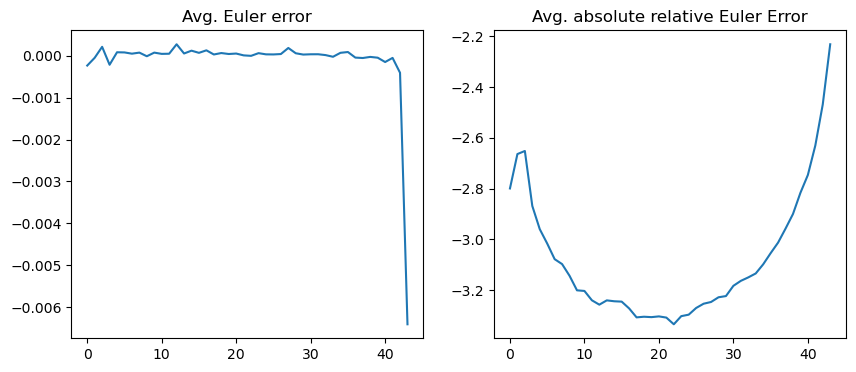

In [216]:
fig =plt.figure(figsize = (10,4))

ax = fig.add_subplot(1,2,1)
ax.plot(Delta_time)
ax.set_title('Avg. Euler error')

ax = fig.add_subplot(1,2,2)
ax.plot(epsilon_time)
ax.set_title('Avg. absolute relative Euler Error')
